In [1]:
# Import necessary libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib


In [2]:
# Function to load images and labels from a folder
def load_images_from_folder(folder_path, label, image_size=(32, 32)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path).convert('L')  # Convert image to grayscale
            img = img.resize(image_size)  # Resize to the desired size
            img_array = np.array(img).flatten()  # Flatten the image to a 1D vector
            images.append(img_array)
            labels.append(label)
    return images, labels


In [3]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1 for SVM
        
        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                
                if condition:
                    dw = 2 * self.lambda_param * self.w  # Regularization term
                    db = 0
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    db = y_[idx]
                
                # Update weights and bias
                self.w -= self.lr * dw
                self.b -= self.lr * db

            # Monitor the training progress (e.g., loss or accuracy)
            if _ % 100 == 0:  # Print every 100 iterations
                print(f"Iteration {_}: weights norm = {np.linalg.norm(self.w)}")

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


In [4]:
# Set paths for benign and malignant images (update these paths accordingly)
benign_path = "/mnt/myFiles/archive (7)/Dataset of Mammography with Benign Malignant Breast Masses/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Benign Masses"
malignant_path = "/mnt/myFiles/archive (7)/Dataset of Mammography with Benign Malignant Breast Masses/Dataset of Mammography with Benign Malignant Breast Masses/DDSM Dataset/Malignant Masses"

# Image size for resizing images
image_size = (32, 32)

# Load images and labels from the specified directories
benign_images, benign_labels = load_images_from_folder(benign_path, label=-1, image_size=image_size)
malignant_images, malignant_labels = load_images_from_folder(malignant_path, label=1, image_size=image_size)

# Combine the data into feature matrix X and label vector y
X = np.array(benign_images + malignant_images)  # All the images in a single array
y = np.array(benign_labels + malignant_labels)  # Corresponding labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create an instance of the SVM class and fit the model on training data
svm_model = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_model.fit(X_train, y_train)


Iteration 0: weights norm = 59.86763443889202
Iteration 100: weights norm = 75.27012435653799
Iteration 200: weights norm = 74.16340283641243
Iteration 300: weights norm = 74.90931380455257
Iteration 400: weights norm = 74.72884165810243
Iteration 500: weights norm = 75.39551374633743
Iteration 600: weights norm = 76.04822961090744
Iteration 700: weights norm = 75.26718472567546
Iteration 800: weights norm = 75.31392761524133
Iteration 900: weights norm = 74.23043385766219


Test Accuracy: 94.82%

Confusion Matrix:
[[1068  123]
 [  13 1422]]


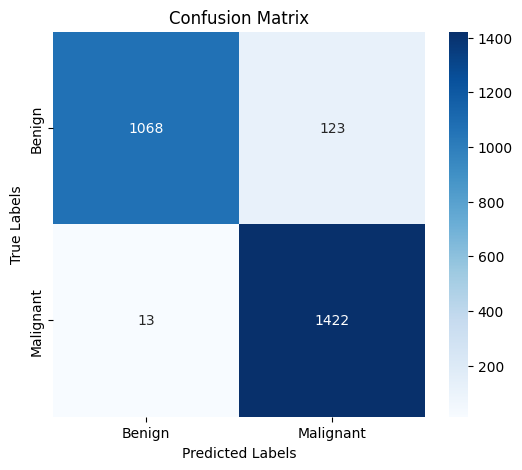


Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.90      0.94      1191
   Malignant       0.92      0.99      0.95      1435

    accuracy                           0.95      2626
   macro avg       0.95      0.94      0.95      2626
weighted avg       0.95      0.95      0.95      2626



In [6]:
# Make predictions on the test set using the trained model
predictions = svm_model.predict(X_test)

# Evaluate accuracy of the model on test set and print results
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix visualization and classification report generation
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

report = classification_report(y_test, predictions, target_names=['Benign', 'Malignant'])
print("\nClassification Report:")
print(report)


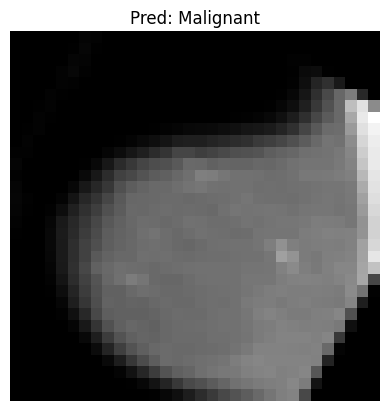

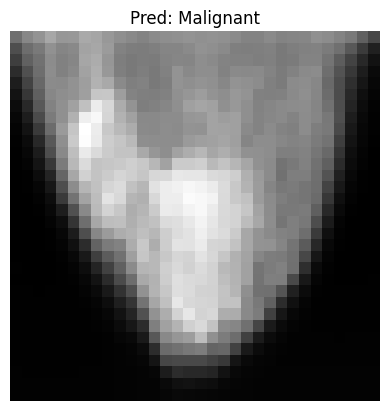

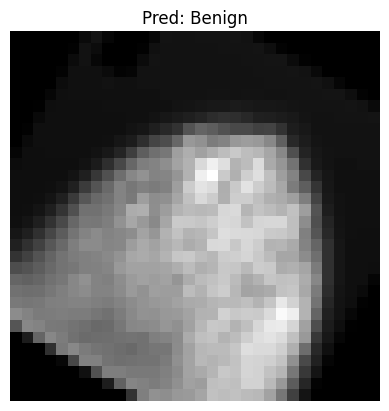

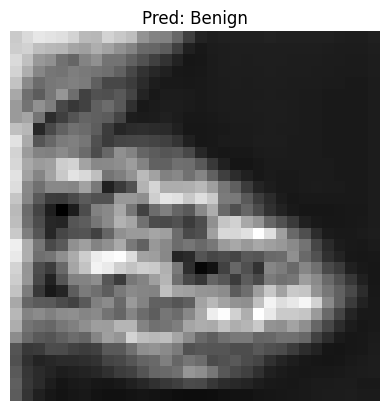

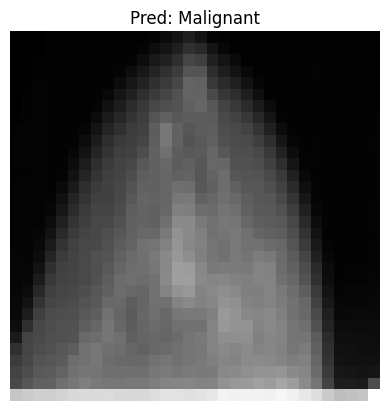

In [7]:
# Visualize some of the test images along with their predicted labels 
for i in range(5):  # Display first 5 test images with predictions
    plt.imshow(X_test[i].reshape(image_size), cmap='gray')  # Reshape to original image size for display
    plt.title(f"Pred: {'Malignant' if predictions[i] == 1 else 'Benign'}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


In [8]:
# Save the trained model using joblib 
joblib.dump(svm_model, 'svm.pkl')
print("Model saved as 'svm.pkl'")


Model saved as 'svm.pkl'
